<h1>Rich or Poor: To Whom Does it Matter More?


This report uses data found in the 2014 European Social Survey which can be accessed <a href="http://www.europeansocialsurvey.org/download.html?file=ESS7e02_1&y=2014">here</a>.
A heavily used resource is Think Stats 2e by Allen Downey, which can be found and read <a href="http://greenteapress.com/wp/think-stats-2e/">here</a>.

In [3]:
""" This file contains code used to analyze the
2014 ESS Survey.

The following packages are required to run this code.
"""

from __future__ import print_function, division
import pandas as pd

import sys
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from operator import itemgetter
from cycler import cycler

from collections import defaultdict


<h5>Income</h5>

Income has been divided into deciles based on reported income. High in this report is considered 10th decile, low is 3rd decile and below, and the rest fall into other.

<h5>Human Values</h5>

Human values were self-reported based on questions framed as such: 

<i>Now I will briefly describe some people. Please listen to each description and tell me how much each person is or is not like you.</i>


    1 Very much like me

    2 Like me

    3 Somewhat like me

    4 A little like me

    5 Not like me

    6 Not like me at all 

Define functions to handle the different analysis and plotting. First, we have to have the functions which load and clean the data.

In [47]:
def ReadESS():
    """ Reads the ESS file.
    TO DO: make a clean file function

    returns a Dataframe
    """
    ess = pd.read_stata('reports/ESS7e02_1.dta',convert_categoricals=False, convert_missing=False)
    CleanESS(ess)
    return ess

def CleanESS(df):
    """ Cleans the DataFrame of the ESS survey """
    na_vals = [66, 77, 88, 99]
    low_na_vals = [7,8,9]
    for column in df:
        df[column].replace(na_vals, np.nan, inplace = True)
    df.imprich.replace(low_na_vals, np.nan, inplace=True)
    df.impfun.replace(low_na_vals, np.nan, inplace=True)
    df.imptrad.replace(low_na_vals, np.nan, inplace=True)
    df.impenv.replace(low_na_vals, np.nan, inplace=True)
    df.iplylfr.replace(low_na_vals, np.nan, inplace=True)
    df.iprspot.replace(low_na_vals, np.nan, inplace=True)
    df.ipbhprp.replace(low_na_vals, np.nan, inplace=True)
    df.ipadvnt.replace(low_na_vals, np.nan, inplace=True)
    df.ipstrgv.replace(low_na_vals, np.nan, inplace=True)
    df.ipsuces.replace(low_na_vals, np.nan, inplace=True)
    df.iphlppl.replace(low_na_vals, np.nan, inplace=True)
    df.impfree.replace(low_na_vals, np.nan, inplace=True)
    df.ipgdtim.replace(low_na_vals, np.nan, inplace=True)
    df.ipmodst.replace(low_na_vals, np.nan, inplace=True)
    df.ipudrst.replace(low_na_vals, np.nan, inplace=True)
    df.ipfrule.replace(low_na_vals, np.nan, inplace=True)
    df.impdiff.replace(low_na_vals, np.nan, inplace=True)
    df.impsafe.replace(low_na_vals, np.nan, inplace=True)
    df.ipshabt.replace(low_na_vals, np.nan, inplace=True)
    df.ipeqopt.replace(low_na_vals, np.nan, inplace=True)
    df.ipcrtiv.replace(low_na_vals, np.nan, inplace=True)

The following function helps to plot the different Cdfs of the groups to follow. We also define a function to easily print out comparisons of means and medians for different groups.

In [48]:
def PlotCdfOfGroup(highdf,otherdf,lowdf,x_label=''):
    """ Given the series desired, creates the cdf
    and plots it on the same plot.
    Because of the discrete values, we jitter the CDFs to make
    them more readable, with an jitter of .5."""
    high_cdf = thinkstats2.Cdf(thinkstats2.Jitter(highdf,.5), label= 'High Income Families')
    other_cdf = thinkstats2.Cdf(thinkstats2.Jitter(otherdf,.5), label = 'Medium Income Families')
    low_cdf = thinkstats2.Cdf(thinkstats2.Jitter(lowdf,.5), label = 'Low Income Families')
    
    thinkplot.PrePlot(3)
    thinkplot.Cdfs([high_cdf, other_cdf, low_cdf])
    thinkplot.Config(xlabel=x_label, ylabel = 'CDF', loc='lower right')
    thinkplot.Show()
    
def PrintMeanMedian(highdf, otherdf, lowdf):
    """ Given series, reports the means, medians, and differences between
    the high and low income means and medians."""
    
    print("High Income Mean and Median:", highdf.mean(), highdf.median())
    print("Medium Income Mean and Median:", otherdf.mean(), otherdf.median())
    print("Low Income Mean and Median:", lowdf.mean(), lowdf.median())
    print("Difference between High and Low Means:", lowdf.mean()-highdf.mean())
    print("Difference between High and Low Medians:", lowdf.median()-highdf.median())
    

The Cohen Effect Size lets us see how much the differences actually matter in terms of standard deviations.

In [37]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

This function plots the mean and standard deviation to either side of a set of data, which lets us visualize the differences between groups more easily.

In [39]:
def MSTDs(given_list, title):
    """ Given a list of tuples with means and a corresponding standard deviation, plots the mean as a dot
    and the STD as a line to either side.
    
    given_list: a list of tuples of means and stds
    title: a string with what the graph should be called
    """
    mstd_list = sorted(given_list,key=itemgetter(0))
    indeces = range(len(mstd_list))
    tick_labels = [' ']
    plt.rc('axes', prop_cycle=(cycler('color', ['#C67F4F', '#3C5783', '#C69B4F', '#327D71'])))
    for i in indeces:
        lower_bound, upper_bound = mstd_list[i][0]-mstd_list[i][1], mstd_list[i][0]+mstd_list[i][1]
        tick_labels.append(mstd_list[i][2])
        plt.plot((lower_bound,upper_bound), (i,i), lw=5)
    plt.plot([x[0] for x in mstd_list], indeces,'ko')
    plt.ylim(-1, len(mstd_list))
    plt.yticks(range(-1,len(mstd_list)), tick_labels)
    plt.title(title)
    plt.show()

In [44]:
def FindCountries(ess):
    """ Returns a list of the country abbreviations in the ESS."""
    country_list = []
    for country in ess.cntry:
        if country not in country_list:
            country_list.append(country)
    return country_list

Once the functions are defined, load, clean, and separate the data into high, middle, and low income brackets:

In [6]:
ess = ReadESS()
rich = ess[(ess.hinctnta == 10)] # top 10% of income
poor = ess[ess.hinctnta <= 3] # bottom 30% of income
other = ess[(ess.hinctnta < 10)&(ess.hinctnta >3)] # all the rest

We can then immediately begin to look at the importance of wealth for the different income brackets.

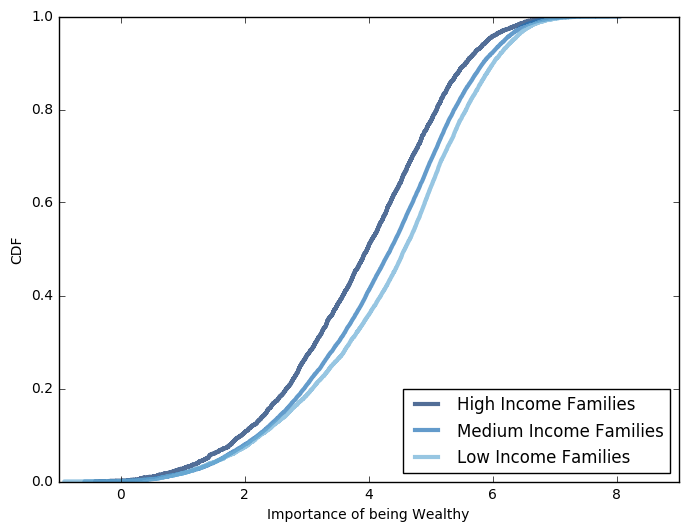

High Income Mean and Median: 3.8464138190011266 4.0
Medium Income Mean and Median: 4.170227356649259 4.0
Low Income Mean and Median: 4.336197970594326 5.0
Difference between High and Low Means: 0.48978415159319955
Difference between High and Low Medians: 1.0


In [30]:
PlotCdfOfGroup(rich.imprich, other.imprich, poor.imprich,'Importance of being Wealthy')
PrintMeanMedian(rich.imprich, other.imprich, poor.imprich)

From this, we see that high income groups do have a lower score than low income, and even more of a difference in the median response.

Next, we'll look at some other values.

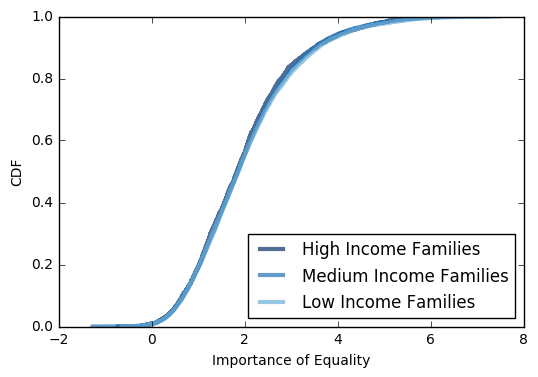

High Income Mean and Median: 1.9526137645731478 2.0
Medium Income Mean and Median: 1.992929879174801 2.0
Low Income Mean and Median: 2.0165734410607 2.0
Difference between High and Low Means: 0.0639596764875523
Difference between High and Low Medians: 0.0


In [50]:
PlotCdfOfGroup(rich.ipeqopt, other.ipeqopt, poor.ipeqopt,'Importance of Equality')
PrintMeanMedian(rich.ipeqopt, other.ipeqopt, poor.ipeqopt)

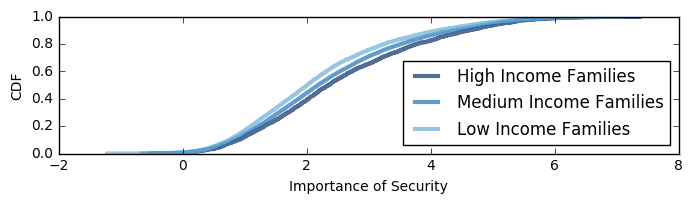

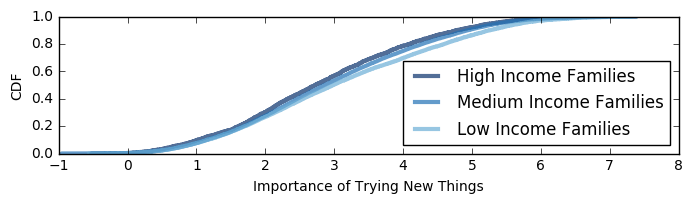

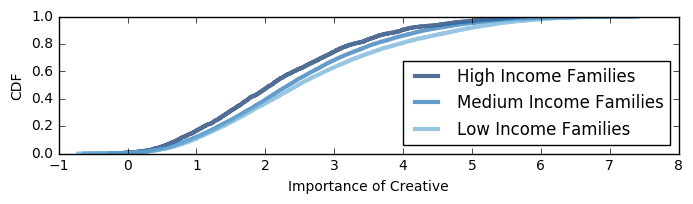

In [36]:
plt.figure(1)
plt.subplot(311)
PlotCdfOfGroup(rich.impsafe, other.impsafe, poor.impsafe,'Importance of Security')

plt.subplot(312)
PlotCdfOfGroup(rich.impdiff, other.impdiff, poor.impdiff,'Importance of Trying New Things')

plt.subplot(313)
PlotCdfOfGroup(rich.ipcrtiv, other.ipcrtiv, poor.ipcrtiv,'Importance of Creative')


In [38]:
print("Rich vs. Average importance of being wealthy:",CohenEffectSize(rich.imprich, other.imprich))
print("Rich vs. Poor importance of being wealthy:",CohenEffectSize(rich.imprich, poor.imprich))
print("Average vs. Poor importance of being wealthy:",CohenEffectSize(other.imprich, poor.imprich))

Rich vs. Average importance of being wealthy: -0.25059732069
Rich vs. Poor importance of being wealthy: -0.369324192354
Average vs. Poor importance of being wealthy: -0.127171687687


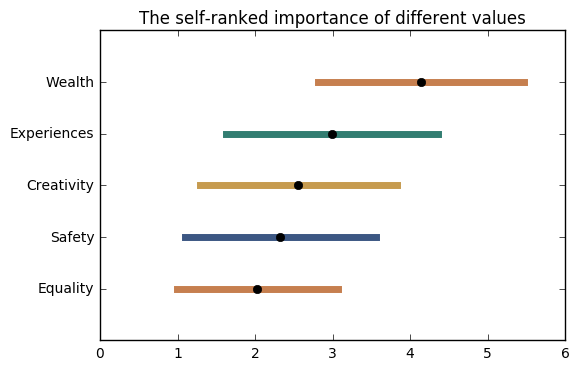

In [49]:
wealth_tuple = (ess.imprich.mean(),ess.imprich.std(),"Wealth")
creative_tuple = (ess.ipcrtiv.mean(),ess.ipcrtiv.std(),"Creativity")
equal_tuple = (ess.ipeqopt.mean(),ess.ipeqopt.std(),"Equality")
safe_tuple = (ess.impsafe.mean(),ess.impsafe.std(),"Safety")
diff_tuple = (ess.impdiff.mean(),ess.impdiff.std(),"Experiences")

mstd_list = [wealth_tuple, creative_tuple, equal_tuple,safe_tuple,diff_tuple]
MSTDs(mstd_list, "The self-ranked importance of different values")

AT = Austria

BE = Belgium

CH = Switzerland

CZ = Czech Republic

DE = Germany

DK = Denmark

EE = Estonia

ES = Spain

FI = Finland

FR = France

GB = United Kingdom

HU = Hungary

IE = Ireland

IL = Israel

LT = Lithuania

NL = Netherlands

NO = Norway

PL = Poland

PT = Portugal

SE = Sweden

SI = Slovenia

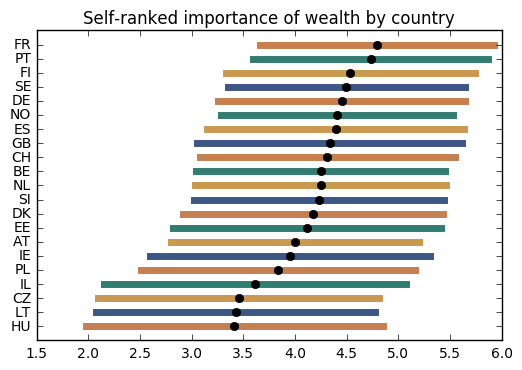

In [45]:
mstd_cntries = []
for country in FindCountries(ess):
    this_country = ess[ess.cntry==country].imprich
    mstd_cntries.append((this_country.mean(),this_country.std(),country))
    
MSTDs(mstd_cntries, "Self-ranked importance of wealth by country")

In [46]:
minimum_obsession = max([x[0] for x in mstd_cntries])
maximum_obsession = min([x[0] for x in mstd_cntries])

min_obsessed_cntry =[item[2] for item in mstd_cntries if item[0] == minimum_obsession]
max_obsessed_cntry =[item[2] for item in mstd_cntries if item[0] == maximum_obsession]

print("Country least obsessed with wealth:", min_obsessed_cntry)
print("Country most obsessed with wealth:", max_obsessed_cntry)

Country least obsessed with wealth: ['FR']
Country most obsessed with wealth: ['HU']
